<a href="https://colab.research.google.com/github/dkalenov/Healthcare-Research-by-Countries/blob/main/Clustering_Countries_by_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Objective:

Clustering of countries by health care costs as a percentage of GDP and
life expectancy.



---



There is [data](https://raw.githubusercontent.com/dkalenov/Healthcare-Research-by-Countries/main/country_healthcare_data.csv) on the economic and demographic indicators of countries for the “uncertain” year.
We are interested in 2 indicators:
- health - health care costs as a percentage of GDP.
- life_expec - life expectancy.

Tasks:
1. Prepare data;
2. Analyze the data;
3. Based on two indicators, cluster countries into n-groups (determine the number of clusters yourself);
4. Construct graphs based on the clustering results;
5. Interpret the result (describe the resulting groups).


# EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Data Extraction
url = "https://raw.githubusercontent.com/obulygin/content/main/country_data/Country-data.csv"
df = pd.read_csv(url)

In [ ]:
data = df.copy()
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Function for displaying basic information about the dataset

def basic_data_preprocessing(dataframe):

    # Convert all column titles to lowercase with "_" between words
    dataframe.columns = [x.lower().replace(' ', '_') for x in dataframe.columns.values]

    # Basic information about the dataset
    rows_num, columns_num = dataframe.shape
    print(f'Number of records: {rows_num}')
    print(f'Number of columns: {columns_num}\n')
    print('-' * 75)

    # Dataset information
    print("\nDataset Information:")
    display(dataframe.info())
    print()
    print('-' * 75)

    # Checking for missing values
    missing_values = dataframe.isnull().sum()
    if missing_values.sum() > 0:
        print("Missing values:")
        display(pd.DataFrame(missing_values, columns=['Missing Count']))
        display(dataframe[dataframe.isna().any(axis=1)])
    else:
        print("No missing values.")
    print('-' * 75)

    # Checking for zero-filled columns
    zero_columns = dataframe.columns[(dataframe == 0.0).any()]
    zero_count = dataframe[zero_columns].apply(lambda x: x.value_counts().get(0, 0))
    if zero_count.sum() != 0:
        print('Rows with value 0 found:')
        display(pd.DataFrame(zero_count, columns=['Zero Count']))
    else:
        print('No rows with value 0.')
    print('-' * 75)

    # Checking for duplicates
    if dataframe.duplicated().sum() > 0:
        print("Duplicate data found. Number of duplicates:", dataframe.duplicated().sum())
        display(dataframe[dataframe.duplicated(keep=False)])
    else:
        print("No duplicates found.")
    print('-' * 75)

    # Checking for negative values in the dataframe
    # Excluding columns with string data type (object type)
    dataframe_digits = dataframe.select_dtypes(exclude=['object'])
    if (dataframe_digits < 0).sum().sum() > 0:
        print("Negative values found:")
        display(pd.DataFrame((dataframe_digits < 0).sum(), columns=['Negative Value Count']))
    else:
        print('No negative values found.')
    print('-' * 75)

    # Statistical description of the data
    print("\nStatistical Description of the Data:\n")
    display(dataframe.describe())
    print('-' * 75)

In [ ]:
basic_data_preprocessing(data)

Number of records: 167
Number of columns: 10

---------------------------------------------------------------------------

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


None


---------------------------------------------------------------------------
No missing values.
---------------------------------------------------------------------------
No rows with value 0.
---------------------------------------------------------------------------
No duplicates found.
---------------------------------------------------------------------------
Negative values found:


,Negative Value Count
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,8
life_expec,0
total_fer,0
gdpp,0


---------------------------------------------------------------------------

Statistical Description of the Data:



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


---------------------------------------------------------------------------


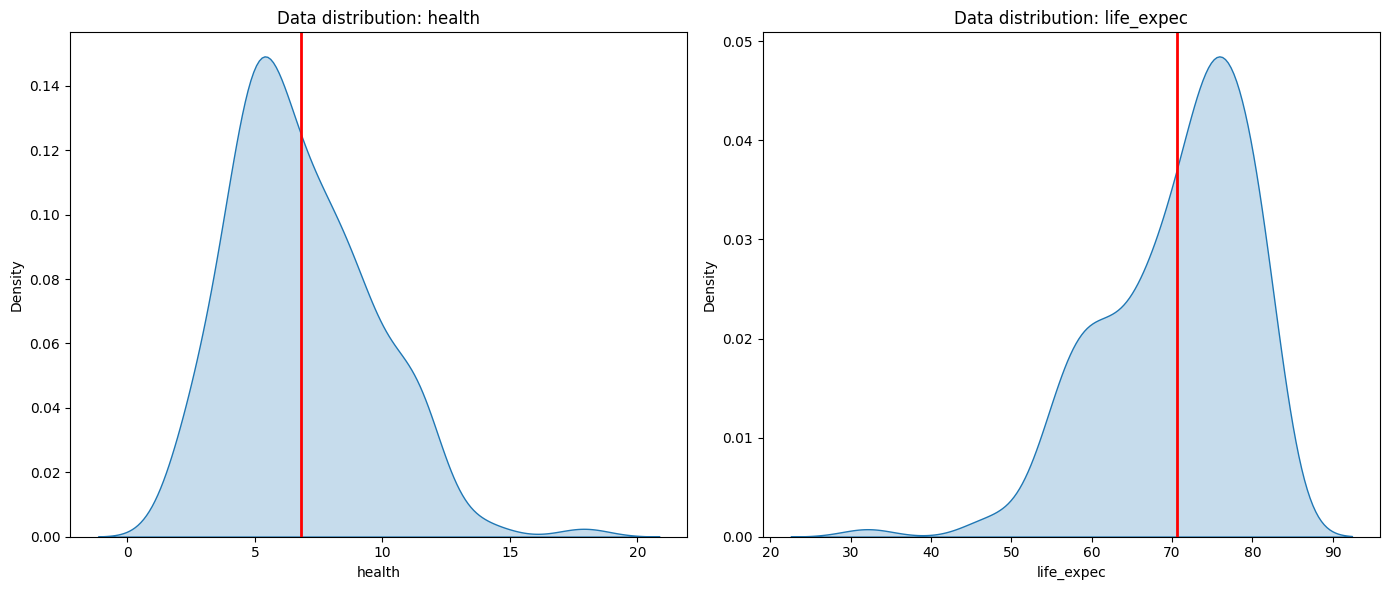

In [ ]:
# Distributed data 'health' and 'life_expec'
import matplotlib.pyplot as plt
import seaborn as sns


column = 'health'
column1 = 'life_expec'

plt.figure(figsize=(14, 6))

# graph for 'column'
plt.subplot(1, 2, 1)
sns.kdeplot(data[column], fill=True)
plt.axvline(x=data[column].mean(), color='r', linestyle='-', linewidth=2)
plt.xlabel(column)
plt.ylabel('Density')
plt.title(f'Data distribution: {column}')

# graph for 'column1'
plt.subplot(1, 2, 2)
sns.kdeplot(data[column1], fill=True)
plt.axvline(x=data[column1].mean(), color='r', linestyle='-', linewidth=2)
plt.xlabel(column1)
plt.ylabel('Density')
plt.title(f'Data distribution: {column1}')

plt.tight_layout()
plt.show()

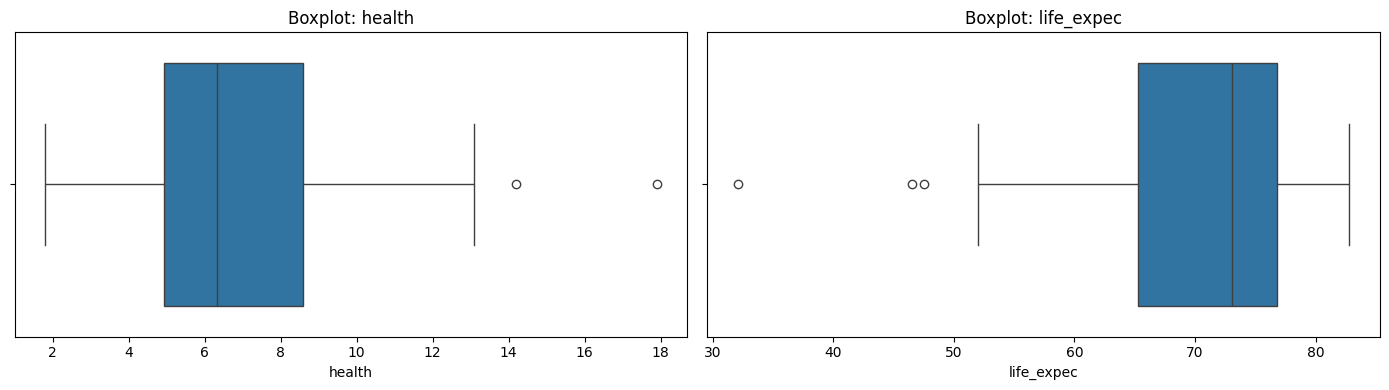

In [ ]:
# outliers in 'health' and 'life_expec'

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))

# Boxplot for 'health'
plt.subplot(1, 2, 1)
sns.boxplot(x=data['health'])
plt.xlabel('health')
plt.title('Boxplot: health')

# Boxplot for 'life_expec'
plt.subplot(1, 2, 2)
sns.boxplot(x=data['life_expec'])
plt.xlabel('life_expec')
plt.title('Boxplot: life_expec')

plt.tight_layout()
plt.show()

* 'health' is skewed to the right; 'life_expec' is skewed to the left.

* There are minor outliers in the 'health' and 'life_expec' indicators.

CONCLUSION: To train a clustering model, it is better to regularize the data.

In [ ]:
# standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['health', 'life_expec']])

# Convert standardized data into a dataframe for ease of use
X_scaled = pd.DataFrame(X_scaled, columns=['health', 'life_expec'])
X_scaled.head(3)

,health,life_expec
0,0.279088,-1.619092
1,-0.097016,0.647866
2,-0.966073,0.670423


Let's build a scatter plot that helps visualize the relationship between the two 'health', 'life_expec'.

<Axes: xlabel='health', ylabel='life_expec'>

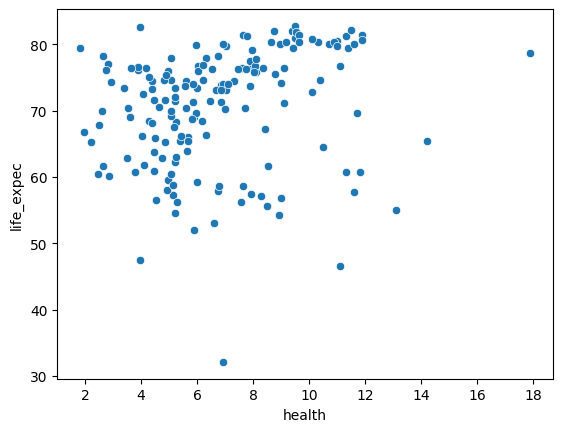

In [ ]:
sns.scatterplot(x=data['health'], y=data['life_expec'])

It is still difficult to visually divide data into any classes

# Clustering

## Define clusters

### Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

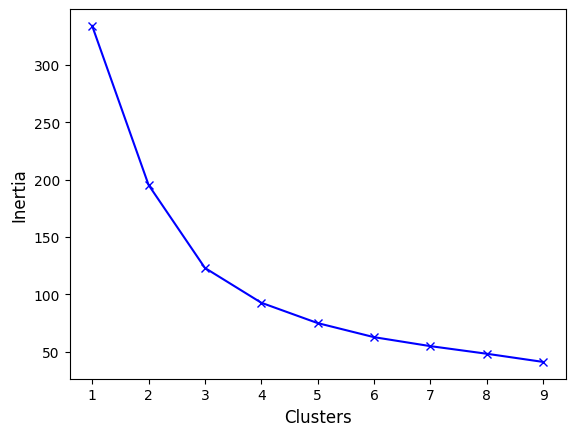

In [ ]:
from sklearn.cluster import KMeans

def get_inertia(cluster_num, X):
     k_means = KMeans(n_clusters=cluster_num, random_state=42)
     k_means.fit(X)
     inertia = k_means.inertia_
     return inertia

inertia = []
for cluster_num in range(1, 10):
     inertia.append(get_inertia(cluster_num, X_scaled))

# visualize how inertia changed depending on the number of clusters
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

Elbow method defines that it is worth choosing 3 clusters

### Silhouette

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='cluster', ylabel='silhouette'>

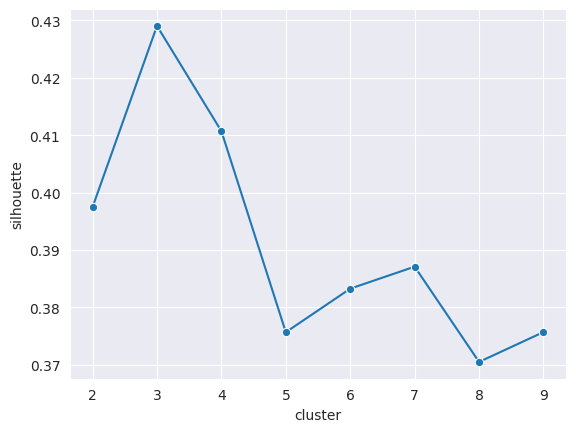

In [ ]:
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
     k_means = KMeans(n_clusters=cluster_num, random_state=42)
     k_means.fit(X)
     # calculate the silhouette metric by passing the data and which clusters the objects belong to
     silhouette = silhouette_score(X, k_means.predict(X))
     return silhouette

# create an empty dictionary, the keys will be inertia and the number of clusters
silhouette_res = {"silhouette": [], "cluster": []}

# select the required data
X = df[['health', 'life_expec']]

for cluster_num in range(2, 10):
     silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_scaled))
     silhouette_res["cluster"].append(cluster_num)

# save the silhouette value and the number of clusters in a dataframe
silhouette_df = pd.DataFrame(silhouette_res)

# set the style for visualization
sns.set_style("darkgrid")
# visualize the dependence of the inertia value on the number of clusters
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")

Silhouette method defines that it is worth choosing 3 clusters

## Trainig

### KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


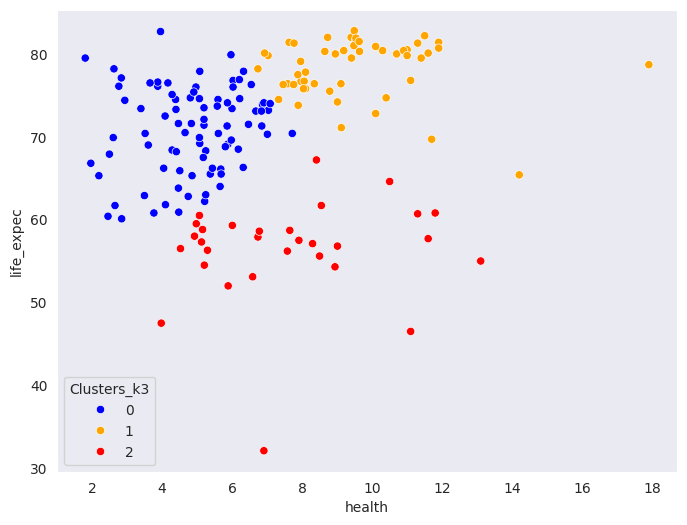

In [ ]:
from sklearn.cluster import KMeans

# initialize the k-means algorithm with the number of clusters 3
kmeans = KMeans(3, random_state=42)
# train and predict which cluster countries belong to
predictions = kmeans.fit_predict(X_scaled)
# Get class labels
predictions = kmeans.labels_
# save the predictions to a dataframe
data['Clusters_k3'] = predictions

# Set colors for each class
colors = ['blue', 'orange', 'red']
# Create a scatter plot taking into account the color of the classes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['health'], y=data['life_expec'], hue=data['Clusters_k3'], palette=colors)

# Remove the grid from the chart background
plt.grid(False)
# Add captions to the chart
plt.xlabel('health')
plt.ylabel('life_expec')

plt.show()

In [ ]:
print('Mean value health:', df['health'].mean())
print('Average value life_expec:', df['life_expec'].mean())

Mean value health: 6.8156886227544895
Average value life_expec: 70.55568862275449


If take a look at the average values ​​according to 'health' and 'life_expec', it seems that this clustering does not quite reflect the full picture: countries with low healthcare costs and low life expectancy, and countries with low healthcare costs, are included in one group. but also a high life expectancy.


---



Let's try to divide it into 4 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


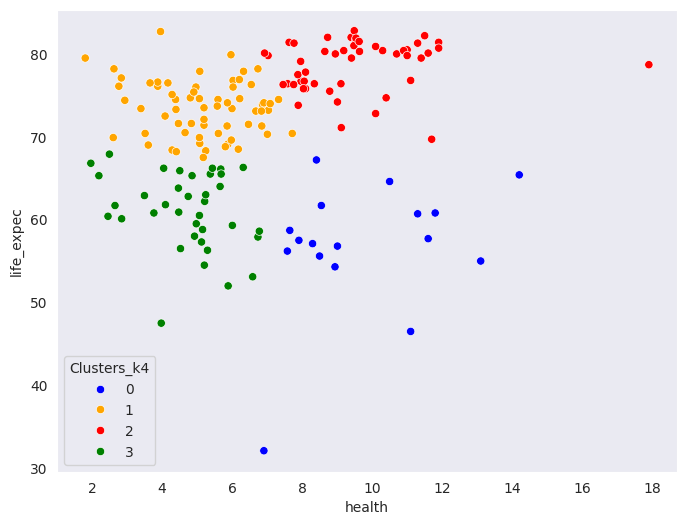

In [ ]:
from sklearn.cluster import KMeans

# initialize the k-means algorithm with the number of clusters 3
kmeans = KMeans(4, random_state=42)
# train and predict which cluster countries belong to
predictions = kmeans.fit_predict(X_scaled)
# Get class labels
predictions = kmeans.labels_
# save the predictions to a dataframe
data['Clusters_k4'] = predictions


# Set colors for each class
colors = ['blue', 'orange', 'red', 'green']
# Create a scatter plot taking into account the color of the classes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['health'], y=data['life_expec'], hue=data['Clusters_k4'], palette=colors)

# Remove the grid from the chart background
plt.grid(False)
# Add captions to the chart
plt.xlabel('health')
plt.ylabel('life_expec')

plt.show()

The resulting division into 4 clusters looks more logical.

### Agglomerative Clustering

'inkage' is a method for determining the distance between clusters, which we discussed above. You can choose single, ward, average, complete; the default is ward

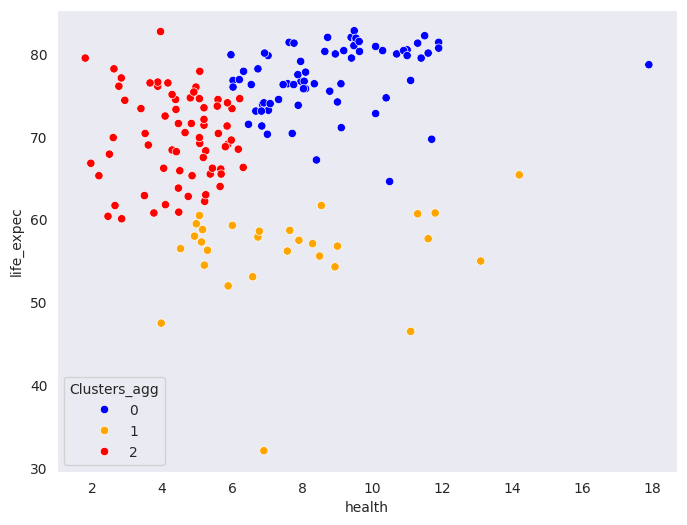

In [ ]:
# Let's try to build 3 clusters
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(3, linkage='ward')
# determine which cluster the countries belong to
predictions = clustering.fit_predict(X_scaled)
# Get class labels
predictions = clustering.labels_
# save the predictions to a dataframe
data['Clusters_agg'] = predictions

# visualize the results.
# Set colors for each class
colors = ['blue', 'orange', 'red']
# Create a scatter plot taking into account the color of the classes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['health'], y=data['life_expec'], hue=data['Clusters_agg'], palette=colors)
# Remove the grid from the chart background
plt.grid(False)
# Add captions to the chart
plt.xlabel('health')
plt.ylabel('life_expec')

plt.show()

In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage

# # calculate the distances between clusters
# linked = linkage(X_scaled, 'ward')

# plt.figure(figsize=(18, 8))

# # clusters with the minimum distance between them will be drawn first
# dendrogram(Z=linked,
# orientation='top',
# labels=df.index,
# distance_sort='descending')

# plt.show()

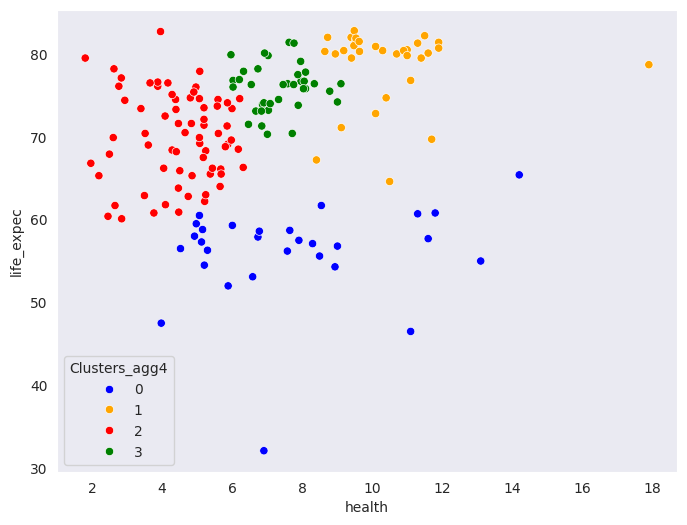

In [ ]:
# 4 clusters

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(4, linkage='ward')
# determine which cluster the countries belong to
predictions = clustering.fit_predict(X_scaled)
# Get class labels
predictions = clustering.labels_
# save the predictions to a dataframe
data['Clusters_agg4'] = predictions

# visualize the results.
# Set colors for each class
colors = ['blue', 'orange', 'red', 'green']
# Create a scatter plot taking into account the color of the classes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['health'], y=data['life_expec'], hue=data['Clusters_agg4'], palette=colors)
# Remove the grid from the chart background
plt.grid(False)
# Add captions to the chart
plt.xlabel('health')
plt.ylabel('life_expec')

plt.show()

In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage

# # calculate the distances between clusters
# linked = linkage(X_scaled, 'ward')

# plt.figure(figsize=(18, 8))

# # clusters with the minimum distance between them will be drawn first
# dendrogram(Z=linked,
# orientation='top',
# labels=df.index,
# distance_sort='descending')

# plt.show()

In general, dividing into 4 clusters using the Agglomerative algorithm looks a little more logical than dividing into 3 clusters using this algorithm.

One more cluster of countries can be distinguished: countries with average health care costs and high life expectancy.

### DBSCAN


<Axes: xlabel='health', ylabel='life_expec'>

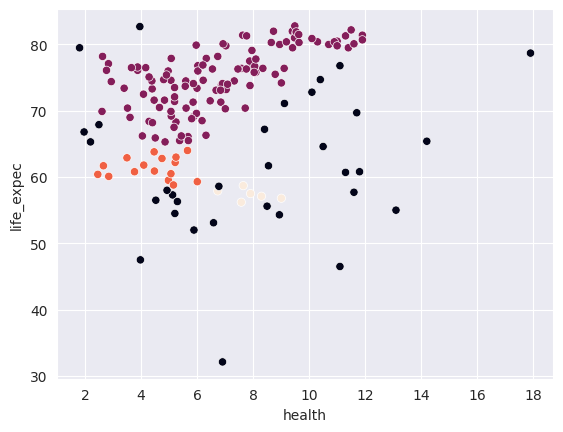

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_pred = dbscan.fit_predict(data[['health','life_expec']])

sns.scatterplot(x=data['health'], y=data['life_expec'], c=dbscan_pred)

CONCLUSION: The DBSCAN algorithm is not suitable for solving this problem

# Algorithm selection

Let's plot graphs to compare algorithms

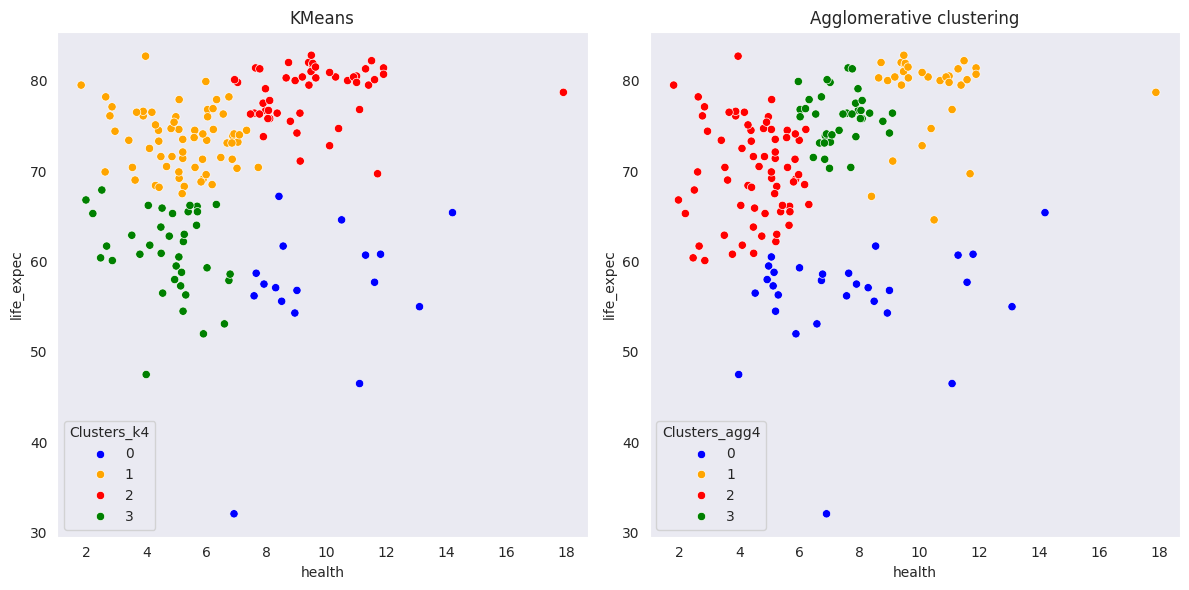

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set colors for each class
colors = ['blue', 'orange', 'red', 'green']

# Create a graphical window with two subgraphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subgraph: Clusters_k3
# Create a scatter plot taking into account the color of the classes
sns.scatterplot(x=data['health'], y=data['life_expec'], hue=data['Clusters_k4'], palette=colors, ax=ax1)
# Remove the grid from the chart background
ax1.grid(False)
# Add captions to the chart
ax1.set_xlabel('health')
ax1.set_ylabel('life_expec')
# Add a chart signature
ax1.set_title('KMeans')

# Second subplot: Clusters_agg
# Create a scatter plot taking into account the color of the classes
sns.scatterplot(x=data['health'], y=data['life_expec'], hue=data['Clusters_agg4'], palette=colors, ax=ax2)
# Remove the grid from the chart background
ax2.grid(False)
# Add captions to the chart
ax2.set_xlabel('health')
ax2.set_ylabel('life_expec')
# Add a chart signature
ax2.set_title('Agglomerative clustering')

# Display graphs on one plane
plt.tight_layout()
plt.show()

In general, the graphs show that both algorithms divided the data into different clusters, but with similar logic.

* Kmeans:

1) low health care costs - life expectancy below average;  
2) low health care costs - life expectancy is about or above average;  
3) low healthcare costs - below average life expectancy;  
4) low health care costs - life expectancy is around or above average;

* Agglomerative Clustering:

1) low healthcare costs - life expectancy is below average;  
2) low health care costs - life expectancy is about or above average;  
3) low healthcare costs - below average life expectancy;  
4) average health care costs - life expectancy - life expectancy is about or above average;


---



For this task, the KMeans model seems more suitable. I offer also try, based on the KMeans model, to identify the 5th cluster: countries with average healthcare costs, but life expectancy around or above average.

However, the order of cluster labels may differ between different runs of the algorithm (due to the KMeans algorithm choosing a random starting coordinate, the order of cluster labels may change each time the code is run), which makes it difficult to interpret the data. Let's try to fix this by setting initial cluster labels manually and fixing the clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


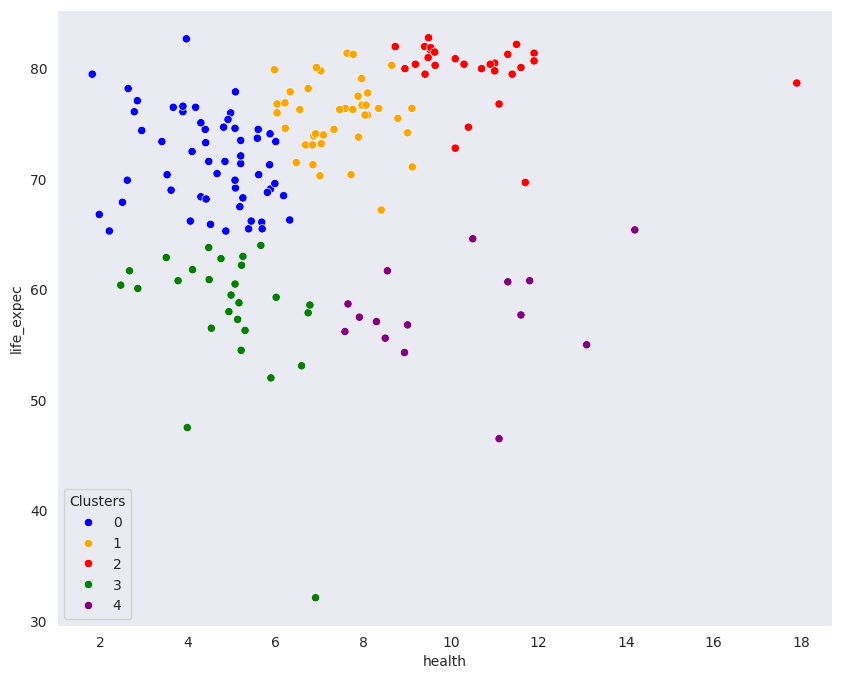

In [ ]:
# Let's set the initial cluster labels manually and fix the cluster labels, try to split them into 5 clusters.

from sklearn.cluster import KMeans

# initialize the k-means algorithm with 5 clusters, fixed random_state and initial coordinates centroid
kmeans = KMeans(5, random_state=42, init=[[0, 0], [1, 1], [2, 2], [3,3], [4, 4]])
# train and predict which cluster the points belong to
predictions = kmeans.fit_predict(X_scaled)

# Get class labels
predictions = kmeans.labels_
# save predictions to dataframe df
df['Clusters'] = predictions

# Set colors for each class
colors = ['blue', 'orange', 'red', 'green', 'purple']
# Create a scatter plot taking into account the color of the classes
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['health'], y=df['life_expec'], hue=df['Clusters'], palette=colors)
# Add captions to the chart
plt.xlabel('health')
plt.ylabel('life_expec')
# Remove the grid from the chart background
plt.grid(False)

plt.show()

In [ ]:
# replace class labels according to grouping

# Create a value replacement dictionary
replace_dict = {3:1, 0:2, 4:3, 2:4, 1:5}

# Replace the values in the 'Clusters' column using the .replace() method
df['Clusters'] = df['Clusters'].replace(replace_dict)

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,5
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,5
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


# Conclusion

Visualization of the distribution of countries by groups

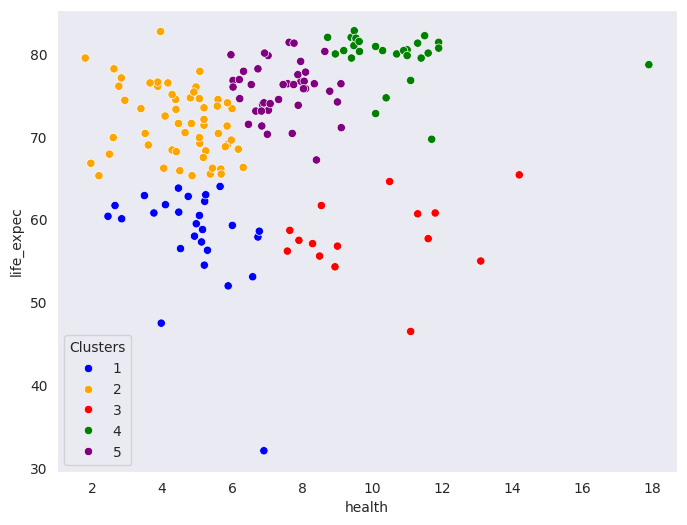

In [ ]:
colors = ['blue', 'orange', 'red', 'green', 'purple']
# Create a scatter plot taking into account the color of the classes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['health'], y=df['life_expec'], hue=df['Clusters'], palette=colors)
# Add captions to the chart
plt.xlabel('health')
plt.ylabel('life_expec')
# Remove the grid from the chart background
plt.grid(False)

plt.show()

Based on the indicators "health" (healthcare costs as a percentage of GDP) and "life_expec" (life expectancy), it was decided to divide the data into the following 5 groups:


1. Group of countries with below-average healthcare costs and below-average life expectancy: This group will include countries where the healthcare system is not very developed and where life expectancy remains low.

2. Group of countries with below-average healthcare costs and near or above-average life expectancy: This group will include countries where healthcare is organized effectively despite low healthcare costs, and where life expectancy remains high.

3. Group of countries with above-average healthcare spending but below-average life expectancy: This group will include countries that spend significant amounts of money on healthcare but, for various reasons, have low life expectancy levels.

4. Group of countries with above average healthcare costs and near or above average life expectancy: This group will include countries that devote a significant portion of their GDP to healthcare and have high life expectancy.

5. Group of countries with near-average healthcare costs and near or above-average life expectancy: This group will include countries that devote a sufficient portion of their GDP to healthcare and have high life expectancy.

In [ ]:
# Grouping countries into clusters and creating a list of countries for each cluster

cluster_countries = df.groupby('Clusters')['country'].apply(list)

# Create a new dataframe
cluster_table = pd.DataFrame.from_dict(cluster_countries, orient='columns')

cluster_table

,country
Clusters,
1,"[Angola, Benin, Burkina Faso, Cameroon, Centra..."
2,"[Algeria, Armenia, Azerbaijan, Bahrain, Bangla..."
3,"[Afghanistan, Botswana, Burundi, Congo, Dem. R..."
4,"[Australia, Austria, Belgium, Bosnia and Herze..."
5,"[Albania, Antigua and Barbuda, Argentina, Baha..."
